# Profit Prediction 

<img src='images/profit.avif'>

The profit earned by a company for a particular period depends on several factors like how much time and money a company spends on R&D, marketing and many more. So for predicting the profit of a company for a particular period we need to train a machine learning model with a dataset that contains historical data about the profit generated by the company.

The task of predicting profit is an important task for every business to set an achievable goal. For example, if the business spends $500 on marketing, it can’t expect a profit of $20,000. Likewise, there are many other factors on which the profit of a business depends. A company must therefore set a goal that can be achieved. In the section below, I will walk you through the task of profit prediction with machine learning using Python.

| Column Name       | Description                                                     |
|-------------------|-----------------------------------------------------------------|
| `R&D Spend`       | Research and Development (R&D) expenditure in dollars.          |
| `Administration`  | Administrative expenses in dollars.                            |
| `Marketing Spend` | Marketing expenses in dollars.                                  |
| `State`           | The state where the company is located (New York, California, Florida). |
| `Profit`          | The profit earned by the company in dollars.                    |


## Importing Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

## Importing Data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv')  

## EDA - Exploratory Data Analysis

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.shape

(50, 5)

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Data Visualization

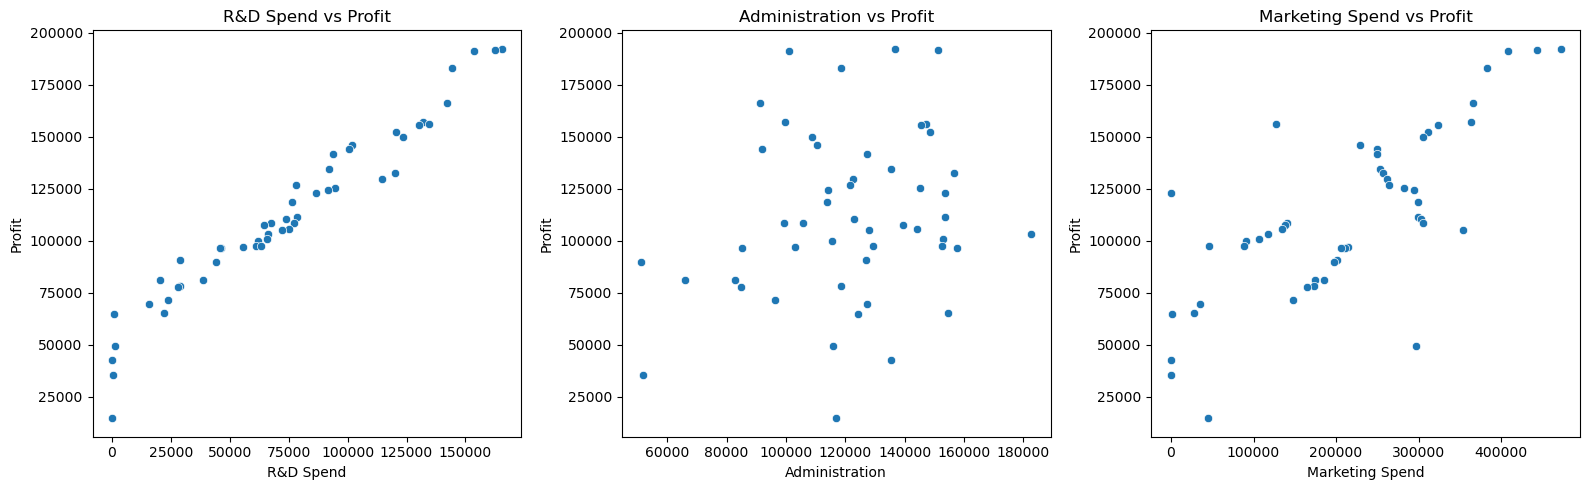

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='R&D Spend', y='Profit', data=df)
plt.title('R&D Spend vs Profit')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Administration', y='Profit', data=df)
plt.title('Administration vs Profit')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Marketing Spend', y='Profit', data=df)
plt.title('Marketing Spend vs Profit')

plt.tight_layout()
plt.show();

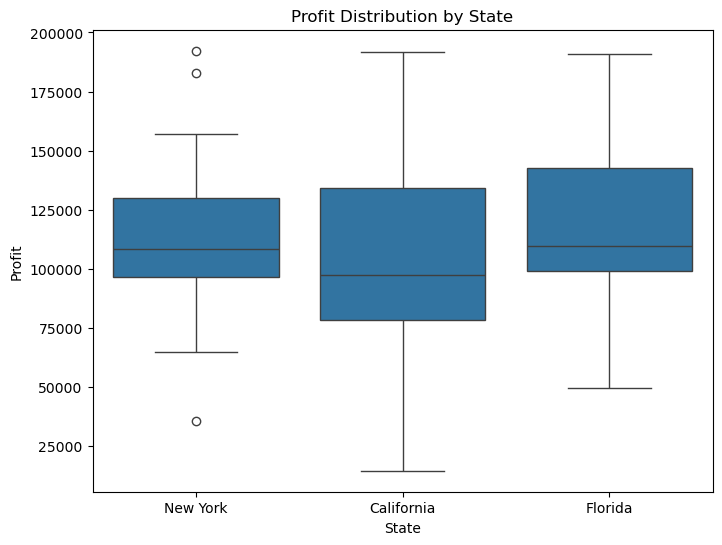

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Profit Distribution by State')
plt.show()

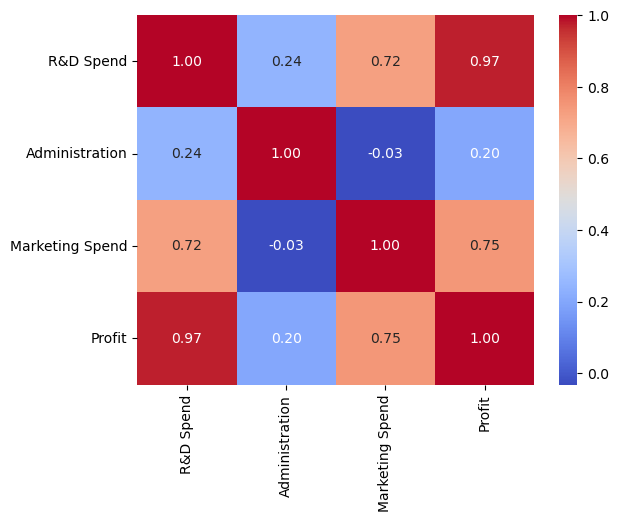

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f');

# Modelling

In [34]:
x = df[["R&D Spend", "Administration", "Marketing Spend"]]
y = df["Profit"]

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [36]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Lasso,9.000653e-01,8.995906e+03,6.979152e+03
ElasticNet,9.000653e-01,8.995906e+03,6.979152e+03
Linear,9.000653e-01,8.995906e+03,6.979152e+03
Ridge,9.000653e-01,8.995906e+03,6.979152e+03
Gradient Boosting,8.945107e-01,9.242534e+03,8.403913e+03
KNeighborsRegressor,8.931623e-01,9.301415e+03,7.279104e+03
XGBRegressor,8.730169e-01,1.014051e+04,7.757660e+03
Decision Tree,7.883424e-01,1.309193e+04,1.027473e+04
mlp_regressor,6.642621e-01,1.648872e+04,1.337838e+04
Extra Tree,6.088870e-01,1.779663e+04,1.044469e+04


In [37]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [43]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']